<a href="https://colab.research.google.com/github/MagomedNalgiev/Google-Colab/blob/main/ML_learn_Movie_reveiws.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow nltk

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
import random
from sklearn.model_selection import train_test_split

In [3]:
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]


In [5]:
random.shuffle(documents)

In [6]:
all_words = []
for sentence, category in documents:
    for word in sentence:
        all_words.append(word.lower())

all_words = nltk.FreqDist(all_words)
word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features[word] = (word in document_words)
    return features


In [7]:
eaturesets = [(document_features(d), c) for (d, c) in documents]
X = [" ".join(doc) for doc, _ in documents]
y = [1 if category == 'pos' else 0 for _, category in documents]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=2000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

maxlen = 100

X_train_pad = keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=maxlen)

In [10]:
model = keras.Sequential([
    layers.Embedding(input_dim=2000, output_dim=32, input_length=maxlen),
    layers.SimpleRNN(32, return_sequences=True),
    layers.SimpleRNN(32),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [12]:
history = model.fit(X_train_pad, np.array(y_train), epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.5096 - loss: 0.7050 - val_accuracy: 0.4625 - val_loss: 0.7068
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6733 - loss: 0.6441 - val_accuracy: 0.4250 - val_loss: 0.7904
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7631 - loss: 0.5144 - val_accuracy: 0.4563 - val_loss: 0.8755
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9347 - loss: 0.2528 - val_accuracy: 0.5063 - val_loss: 0.9706
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9946 - loss: 0.0806 - val_accuracy: 0.5562 - val_loss: 1.1211


In [13]:
test_loss, test_acc = model.evaluate(X_test_pad, np.array(y_test), verbose=2)
print(f"Test accuracy: {test_acc:.2f}")


13/13 - 0s - 15ms/step - accuracy: 0.4750 - loss: 1.1969
Test accuracy: 0.47


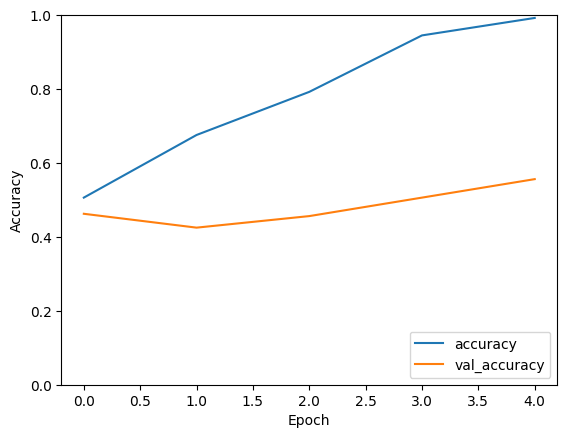

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()